In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [45]:
# 1. generate data
timestep = 10
dataset_size = 20
dataset_x, dataset_y = np.zeros(shape=(dataset_size, timestep, 3)), np.zeros(shape=(dataset_size, 3))

x = np.arange(0, 20.1, 0.1) - np.random.uniform(low=-0.3, high=0.3, size=(201,))
y = np.arange(0, 20.1, 0.1) - np.random.uniform(low=-0.3, high=0.3, size=(201,))
z = np.arange(0, 20.1, 0.1) - np.random.uniform(low=-0.3, high=0.3, size=(201,))
coordinates = np.stack([x, y, z], axis=-1)
for i in range(dataset_size):
    dataset_x[i] = coordinates[i * timestep:(i + 1) * timestep]
    dataset_y[i] = coordinates[(i + 1) * timestep - 1]

dataset_x=dataset_x.astype(np.float64)
dataset_y=dataset_y.astype(np.float64)

dataset_x.shape, dataset_y.shape,dataset_x,dataset_y

((20, 10, 3),
 (20, 3),
 array([[[ 5.13107174e-02,  2.77659348e-01, -1.90608985e-01],
         [ 4.71284523e-02, -1.72399285e-01,  1.49088245e-01],
         [ 2.43012208e-01,  1.29405263e-02, -5.00630971e-02],
         [ 5.56348389e-01,  4.29265985e-01,  5.11597893e-02],
         [ 1.00029045e-01,  1.82731512e-01,  5.54342391e-01],
         [ 3.95842151e-01,  7.51790538e-01,  4.60790495e-01],
         [ 3.57012431e-01,  3.12327418e-01,  8.24645221e-01],
         [ 5.82276492e-01,  4.61846057e-01,  5.19421697e-01],
         [ 7.76631148e-01,  5.77870029e-01,  9.78087774e-01],
         [ 1.17544812e+00,  8.89510307e-01,  8.06612807e-01]],
 
        [[ 1.20372705e+00,  7.27443474e-01,  8.21952666e-01],
         [ 1.22446424e+00,  1.10990108e+00,  1.02569692e+00],
         [ 1.06009632e+00,  1.11663243e+00,  1.49542327e+00],
         [ 1.07270973e+00,  1.04458927e+00,  1.38970187e+00],
         [ 1.53167383e+00,  1.23640543e+00,  1.63800594e+00],
         [ 1.36314302e+00,  1.50918765e+00,

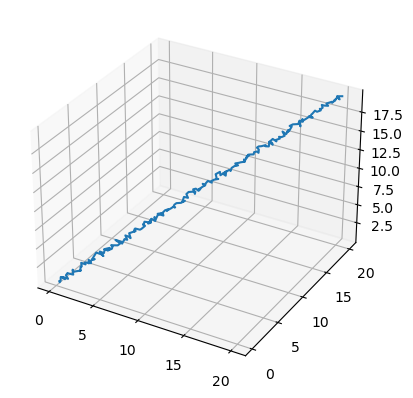

In [41]:
# 2. visualize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

In [42]:
# 3. model
class TrajectoryPredictor(nn.Module):
    def __init__(self):
        super(TrajectoryPredictor,self).__init__()
        self.rnn = nn.RNN(input_size=3, hidden_size=32, batch_first=True)
        self.fc = nn.Linear(in_features=32, out_features=3)

    def forward(self, x):
        rnn_out,_=self.rnn(x)
        x=rnn_out[:,-1,:] # size: (batch_size, seq_length, hidden_size)
        x=self.fc(x)
        return x

model=TrajectoryPredictor()
model

TrajectoryPredictor(
  (rnn): RNN(3, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=3, bias=True)
)

In [57]:
# 4. params
learning_rate=0.001
epochs=20000
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)
device="cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [58]:
# 5. train
train_losses=[]
dataset_torch_x=torch.from_numpy(dataset_x)
dataset_torch_y=torch.from_numpy(dataset_y)
dataset_torch_x=dataset_torch_x.to(device)
dataset_torch_y=dataset_torch_y.to(device)
model.double()
model=model.to(device)

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs=model(dataset_torch_x)
    loss=criterion(outputs,dataset_torch_y)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    print(f"epoch={epoch}/{epochs}, loss={loss.item()}")

epoch=0/20000, loss=4.979168584949088e-08
epoch=1/20000, loss=0.031935218399943
epoch=2/20000, loss=0.002045838406120981
epoch=3/20000, loss=0.00670416869023957
epoch=4/20000, loss=0.018052403942473504
epoch=5/20000, loss=0.01394158949206319
epoch=6/20000, loss=0.004520579432971548
epoch=7/20000, loss=0.00036310010593351965
epoch=8/20000, loss=0.0032598943327936595
epoch=9/20000, loss=0.007778196875731618
epoch=10/20000, loss=0.008369073788130111
epoch=11/20000, loss=0.004961024129068856
epoch=12/20000, loss=0.001332239011043137
epoch=13/20000, loss=0.0005150666501498263
epoch=14/20000, loss=0.0022606792779508614
epoch=15/20000, loss=0.003985120888220431
epoch=16/20000, loss=0.0039344104190019435
epoch=17/20000, loss=0.002524267791047084
epoch=18/20000, loss=0.001117971493064698
epoch=19/20000, loss=0.0006557038671200501
epoch=20/20000, loss=0.0010845936944297826
epoch=21/20000, loss=0.0017246074130843974
epoch=22/20000, loss=0.0018674434013680405
epoch=23/20000, loss=0.001380202778543

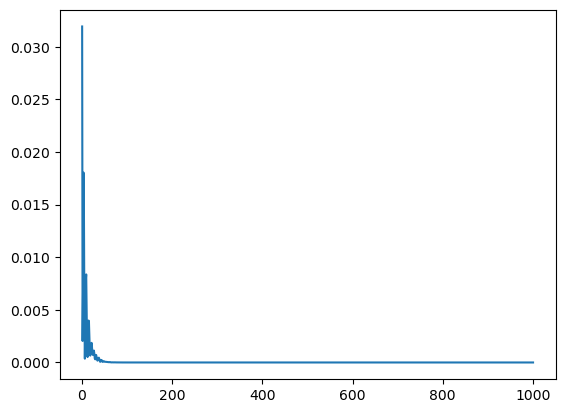

In [70]:
# visualize loss
plt.plot(np.linspace(1,1000,1000),train_losses[1:1001])

[ 0.80661179  1.97007889  2.72387015  3.86786554  4.74575941  5.98953966
  6.64096838  7.78381168  9.16975903  9.9981832  11.0245269  11.76862169
 12.60121751 14.11053612 14.70564964 15.62899075 17.05399611 17.8353898
 18.88623076 19.83163158]


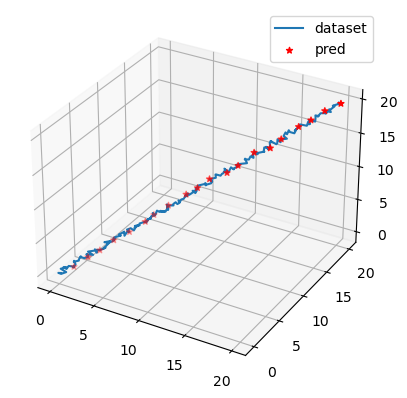

In [95]:
# visualize result
# 2. visualize
import matplotlib.pyplot as plt

with torch.no_grad():
    model.eval()
    pred=model(dataset_torch_x)
    pred=pred.numpy()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)
    ax.scatter(pred[:,0],pred[:,1],pred[:,2],color='r',marker="*")
    ax.legend(['dataset','pred'])
    plt.show()